In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv 

from tvtk.api import tvtk, write_data

In [2]:
import netCDF4
class nlfff:

      def __init__(self,filename):
            self.filename=filename

            nc=netCDF4.Dataset(self.filename,'r')
            self.NOAA=nc.NOAA
            self.year_month_day_time=nc.year_month_day_time
            self.project=nc.project
            self.production_date=nc.production_date
            self.version=nc.version
            self.data_doi=nc.data_doi
            self.http_link=nc.http_link
            self.Distributor=nc.Distributor
            
            nc_x=nc.variables['x']
            self.x=nc_x[:]
            print(nc_x.long_name,' unit:',nc_x.units)
            nc_y=nc.variables['y']
            self.y=nc_y[:]
            print(nc_y.long_name,' unit:',nc_y.units)
            nc_z=nc.variables['z']
            self.z=nc_z[:]
            print(nc_z.long_name,' unit:',nc_z.units)
            
            nc_bx=nc.variables['Bx']
            self.bx=nc_bx[:].transpose(2,1,0)
            print(nc_bx.long_name,' unit:',nc_bx.units)
            nc_by=nc.variables['By']
            self.by=nc_by[:].transpose(2,1,0)
            print(nc_by.long_name,' unit:',nc_by.units)
            nc_bz=nc.variables['Bz']
            self.bz=nc_bz[:].transpose(2,1,0)
            print(nc_bz.long_name,' unit:',nc_bz.units)
            
            nc_bxp=nc.variables['Bx_pot']
            self.bx_pot=nc_bxp[:].transpose(2,1,0)
            print(nc_bxp.long_name,' unit:',nc_bxp.units)
            nc_byp=nc.variables['By_pot']
            self.by_pot=nc_byp[:].transpose(2,1,0)
            print(nc_byp.long_name,' unit:',nc_byp.units)
            nc_bzp=nc.variables['Bz_pot']
            self.bz_pot=nc_bzp[:].transpose(2,1,0)
            print(nc_bzp.long_name,' unit:',nc_bzp.units)
            
      def info(self):
            self.Lx_Mm=max(self.x) - min(self.x)
            self.Ly_Mm=max(self.y) - min(self.y)
            print(f'(Lx, Ly) in Mm = ({self.Lx_Mm:.2f}, {self.Ly_Mm:.2f})\n')
            print(f"NOAA",self.NOAA)
            print(f'year_month_day_time',self.year_month_day_time)
            print(f"project",self.project)
            print(f"production_date",self.production_date)
            print(f"version",self.version)
            print(f"data_doi",self.data_doi)
            print(f"http_link",self.http_link)
            print(f"Distributor",self.Distributor)

      def plot(self):
            xs=12.0
            ys=4.0

            xmin=min(self.x)
            xmax=max(self.x)
            ymin=min(self.y)
            ymax=max(self.y)

            plt.close()
            fig=plt.figure(figsize=(xs,ys))
            ax1=fig.add_axes((0.08,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax2=fig.add_axes((0.4,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax3=fig.add_axes((0.72,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            cax1=fig.add_axes((0.08,0.15,0.25,0.05))
            cax2=fig.add_axes((0.4,0.15,0.25,0.05))
            cax3=fig.add_axes((0.72,0.15,0.25,0.05))
            
            vmin=-3000.0 
            vmax=3000.0
            
            im1=ax1.pcolormesh(self.x,self.y,self.bx[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im2=ax2.pcolormesh(self.x,self.y,self.by[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im3=ax3.pcolormesh(self.x,self.y,self.bz[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')

            cbar1=plt.colorbar(im1,cax=cax1,orientation='horizontal')
            cbar2=plt.colorbar(im2,cax=cax2,orientation='horizontal')
            cbar3=plt.colorbar(im3,cax=cax3,orientation='horizontal')
            
            ax1.set_title('Bx [G]')
            ax1.set_xlabel('x [Mm]')
            ax1.set_ylabel('y [Mm]')
            
            ax2.set_title('By [G]')
            ax2.set_xlabel('x [Mm]')
            ax2.set_ylabel('y [Mm]')
            
            ax3.set_title('Bz [G]')
            ax3.set_xlabel('x [Mm]')
            ax3.set_ylabel('y [Mm]')
            
            #plt.pause(0.1)
            # plt.savefig('./B.png')


In [3]:
data = nlfff('/home/tensor/workspace/pinn_study/_data/12673_20170905_202400/12673_20170905_202400.nc')

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [4]:
Lx = max(data.x) - min(data.x)
Ly = max(data.y) - min(data.y)
Lz = max(data.z) - min(data.z)

Nx = len(data.x)
Ny = len(data.y)
Nz = len(data.z)

dx = np.diff(data.x)[0]
dy = np.diff(data.y)[0]
dz = np.diff(data.z)[0]

print(f'Lx: {Lx}')
print(f'Ly: {Ly}')
print(f'Lz: {Lz}')

print(f'Nx: {Nx}')
print(f'Ny: {Ny}')
print(f'Nz: {Nz}')

# Mm per pixel
print(f'dx: {dx}')
print(f'dy: {dy}')
print(f'dz: {dz}')

# (Nx-1) : # of pixels in x-direction
# (Nx-1)*dx : Mm in x-direction
print(f'(Nx-1)*dx: {(Nx-1)*dx}')
print(f'(Ny-1)*dy: {(Ny-1)*dy}')
print(f'(Nz-1)*dz: {(Nz-1)*dz}')

Lx: 250.724242944
Ly: 163.262298624
Lz: 163.262298624
Nx: 513
Ny: 257
Nz: 257
dx: 0.48969578700000227
dy: 0.6377433539999942
dz: 0.637743354
(Nx-1)*dx: 250.72424294400116
(Ny-1)*dy: 163.2622986239985
(Nz-1)*dz: 163.262298624


In [5]:
vtk_path = '/home/tensor/workspace/pinn_study/_data/12673_20170905_202400_index.vtk'

if not os.path.exists(vtk_path):
    
    b = np.array(np.stack([data.bx, data.by, data.bz], axis=-1))

    dim = b.shape[:-1]

    # ------ Idx -----------------------------------
    pts = np.stack(np.mgrid[0:dim[0], 0:dim[1], 0:dim[2]], -1).astype(np.float32)
    # ----------------------------------------------

    # ------ Mm ------------------------------------
    # x_pts = np.arange(Nx)*dx
    # y_pts = np.arange(Ny)*dy
    # z_pts = np.arange(Nz)*dz
    # pts = np.stack(np.meshgrid(x_pts, y_pts, z_pts, indexing='ij'), axis=-1)
    # ----------------------------------------------

    pts = pts.transpose(2, 1, 0, 3)
    pts = pts.reshape((-1, 3))
    vectors = b.transpose(2, 1, 0, 3)
    vectors = vectors.reshape((-1, 3))
    sg = tvtk.StructuredGrid(dimensions=dim, points=pts)
    sg.point_data.vectors = vectors
    sg.point_data.vectors.name = 'B'
    write_data(sg, str(vtk_path))

In [6]:
mesh = pv.read(vtk_path)

In [7]:
xindmax, yindmax, zindmax = mesh.dimensions
xcenter, ycenter, zcenter = mesh.center

mesh_g = mesh.compute_derivative(scalars='B')

def gradients_to_dict(arr):
    keys = np.array(
        ["dBx/dx", "dBx/dy", "dBx/dz", "dBy/dx", "dBy/dy", "dBy/dz", "dBz/dx", "dBz/dy", "dBz/dz"]
    )
    keys = keys.reshape((3,3))[:, : arr.shape[1]].ravel()
    return dict(zip(keys, mesh_g['gradient'].T))

gradients = gradients_to_dict(mesh_g['gradient'])

curlB_x = gradients['dBz/dy'] - gradients['dBy/dz']
curlB_y = gradients['dBx/dz'] - gradients['dBz/dx']
curlB_z = gradients['dBy/dx'] - gradients['dBx/dy']

curlB = np.vstack([curlB_x, curlB_y, curlB_z]).T

mesh.point_data['curlB'] = curlB
mesh

StructuredGrid (0x7f72bc4c5780)
  N Cells:      33554432
  N Points:     33883137
  X Bounds:     0.000e+00, 5.120e+02
  Y Bounds:     0.000e+00, 2.560e+02
  Z Bounds:     0.000e+00, 2.560e+02
  Dimensions:   513, 257, 257
  N Arrays:     2

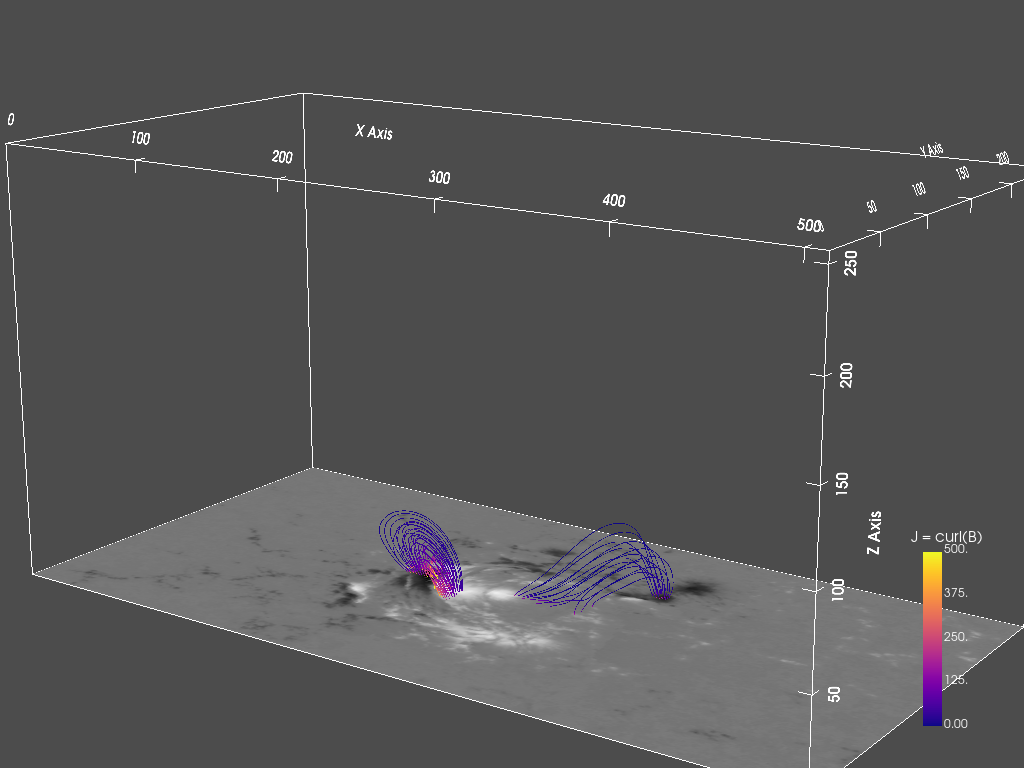

In [17]:
p = pv.Plotter()
p.add_mesh(mesh.outline())
# p.camera_position = 'xz'
# p.camera.azimuth = 30
# p.camera.elevation = 30
# p.camera_position = 'xy'
# p.show_grid()

#-----------------------
sargs_B = dict(
    title='Bz [G]',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.05,
    position_y = 0.05,
)
dargs_B = dict(
    scalars='B', 
    component=2, 
    clim=(-3000, 3000), 
    scalar_bar_args=sargs_B, 
    show_scalar_bar=False, 
    lighting=False
)
p.add_mesh(mesh.extract_subset((0, xindmax, 0, yindmax, 0, 0)), 
           cmap='gray', **dargs_B)
#-----------------------

#-----------------------
sargs_J = dict(
    title='J = curl(B)',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.9,
    position_y = 0.05,
)
dargs_J = dict(
    scalars='curlB', 
    clim=(0, 500),
    scalar_bar_args=sargs_J, 
    show_scalar_bar=True, 
    lighting=False
)
#-----------------------

def draw_streamlines(pts):
    stream, src = mesh.streamlines(
        return_source=True,
        # source_center=(120, 90, 0),
        # source_radius=5,
        # n_points=100,
        start_position = pts,
        integration_direction='both',
        # progress_bar=False,
        max_time=1000,
        # initial_step_length=0.001,
        # min_step_length=0.001,
        # max_step_length=2.0,
        # max_steps=999999,
        # terminal_speed = 1e-16,
        # max_error = 1e-6,
    )
    p.add_mesh(stream.tube(radius=0.2), 
            cmap='plasma', **dargs_J)

# stream, src = mesh.streamlines(
#     return_source=True,
#     source_center=(120, 100, 0),
#     source_radius=5,
#     n_points=100,
#     # start_position = (100, 80, 0),
#     integration_direction='both',
#     max_time=1000,
# )
# p.add_mesh(stream.tube(radius=0.2), 
#            cmap='coolwarm', **dargs_J)

# draw_streamlines((105, 80, 0))
# draw_streamlines((100, 80, 0))
# draw_streamlines((120, 80, 0))


# for i in np.arange(90, 100, 1):
#     for j in np.arange(85, 90, 1):
#         try: 
#             draw_streamlines((i, j, 0))
#         except:
#             print(i, j)

# for i in np.arange(92, 95, 1):
#     for j in np.arange(47, 50, 1):
#         try: 
#             draw_streamlines((i, j, 0))
#         except:
#             print(i, j)

# for i in np.arange(120, 125, 1):
#     for j in np.arange(47, 50, 1):
#         try: 
#             draw_streamlines((i, j, 0))
#         except:
#             print(i, j)

# for i in np.arange(157, 162, 1):
#     for j in np.arange(113, 117, 1):
#         try: 
#             draw_streamlines((i, j, 0))
#         except:
#             print(i, j)

for i in np.arange(90*2, 100*2, 1*2):
    for j in np.arange(65*2, 70*2, 1*2):
        try: 
            draw_streamlines((i, j, 0))
        except:
            print(i, j)

for i in np.arange(160*2, 165*2, 1*2):
    for j in np.arange(89*2, 92*2, 1*2):
        try: 
            draw_streamlines((i, j, 0))
        except:
            print(i, j)

p.camera.azimuth = -100
p.camera.elevation = -20
p.camera.zoom(1.5)
p.show_bounds()
p.show(jupyter_backend='static')